Software Development Tools: Spint 4 Project

In this project I will be using the dataset vehicles_us.csv to make an online app using Render. Since this is my first time attempting this, it will be very simple. It will contain a histogram and scatter plot for visual reference.

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [189]:
print(os.getcwd())


c:\Users\maryk\Project_4\sprint4_project1\venv\notebooks


In [190]:
vehicles = pd.read_csv('vehicles_us.csv')

Gathering info.

Identifying the percentage of missing values in the 'odometer'and model_year columns

Gathering mean info for mileage of different aged vehicles.

In [191]:



missing_percentage = vehicles['odometer'].isnull().sum() / len(vehicles) * 100
print(f"Percentage of missing values in 'odometer': {missing_percentage:.2f}%")

Percentage of missing values in 'odometer': 15.32%


In [192]:
# Get the current year
current_year = pd.Timestamp.now().year

# Filter vehicles that are 11 years old or older
older_vehicles = vehicles[vehicles['model_year'] <= (current_year - 11)]

# Calculate the mean mileage (odometer) of these vehicles
mean_mileage_older = older_vehicles['odometer'].mean()

print(f"Mean mileage of vehicles 11 years old or older: {mean_mileage_older:.2f} miles")

Mean mileage of vehicles 11 years old or older: 133670.04 miles


In [193]:
# Get the current year
current_year = pd.Timestamp.now().year

# Filter vehicles that are ten years old or less
recent_vehicles = vehicles[vehicles['model_year'] >= (current_year - 10)]

# Calculate the mean mileage (odometer) of these vehicles
mean_mileage = recent_vehicles['odometer'].mean()

print(f"Mean mileage of vehicles ten years old or less: {mean_mileage:.2f} miles")

Mean mileage of vehicles ten years old or less: 56112.35 miles


In [194]:
# Get the current year
current_year = pd.Timestamp.now().year

# Filter vehicles that are five years old or less
five_year_old_vehicles = vehicles[vehicles['model_year'] >= (current_year - 5)]

# Calculate the mean mileage (odometer) of these vehicles
mean_mileage_five_years = five_year_old_vehicles['odometer'].mean()

print(f"Mean mileage of vehicles five years old or less: {mean_mileage_five_years:.2f} miles")

Mean mileage of vehicles five years old or less: nan miles


In [195]:
# Identifying the percentage of missing values in the 'model_year' column

missing_percentage_model_year = vehicles['model_year'].isnull().sum() / len(vehicles) * 100
print(f"Percentage of missing values in 'model_year': {missing_percentage_model_year:.2f}%")

Percentage of missing values in 'model_year': 7.02%


Filling missing odometer values with mean or median values based on vehicle age.
Cleaning the datset, filling missing values, dropping duplicates, converting data types

In [196]:



# Fill missing 'odometer' values for vehicles ten years old or less with 55,000 miles
#vehicles.loc[vehicles['model_year'] >= 2013, 'odometer'] = vehicles.loc[vehicles['model_year'] >= 2013, 'odometer'].fillna(55000)


# Fill missing 'odometer' values for vehicles 11 years old or more with 135,000 miles
#vehicles.loc[vehicles['model_year'] < 2013, 'odometer'] = vehicles.loc[vehicles['model_year'] < 2013, 'odometer'].fillna(135000)

In [197]:
# Fill missing 'odometer' values for vehicles ten years old or less with the mean for that group
mean_odometer_younger = vehicles.loc[vehicles['model_year'] >= 2013, 'odometer'].mean()
vehicles.loc[vehicles['model_year'] >= 2013, 'odometer'] = vehicles.loc[vehicles['model_year'] >= 2013, 'odometer'].fillna(mean_odometer_younger)

# Fill missing 'odometer' values for vehicles 11 years old or more with the mean for that group
mean_odometer_older = vehicles.loc[vehicles['model_year'] < 2013, 'odometer'].mean()
vehicles.loc[vehicles['model_year'] < 2013, 'odometer'] = vehicles.loc[vehicles['model_year'] < 2013, 'odometer'].fillna(mean_odometer_older)

print(vehicles['odometer'].isnull().sum())

549


In [198]:
# Group by 'model' and fill missing values with the median
for col in ['model_year', 'cylinders', 'odometer']:
    vehicles[col] = vehicles.groupby('model')[col].transform(lambda x: x.fillna(x.median()))

# Convert to integers, handling potential non-integer values
vehicles['model_year'] = vehicles['model_year'].astype(int).astype('Int64')  
vehicles['cylinders'] = vehicles['cylinders'].astype(int).astype('Int64')  
vehicles['odometer'] = vehicles['odometer'].astype(int)  

print(vehicles['model_year'].isnull().sum())

0


In [199]:
# Verify the changes
print(vehicles[['model', 'cylinders', 'odometer']].isnull().sum())

model        0
cylinders    0
odometer     0
dtype: int64


In [200]:
# Drop duplicates
vehicles.drop_duplicates(inplace=True)

vehicles['paint_color'] = vehicles['paint_color'].fillna(np.nan)


# Convert 'date_posted' to datetime
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'])

# Convert 'price' to float
vehicles['price'] = vehicles['price'].astype('float64')

# Group by 'model' and fill missing 'cylinders' with the median for each group
vehicles['cylinders'] = vehicles.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))

# Group by 'model' and fill missing 'odometer' with the median for each group
vehicles['odometer'] = vehicles.groupby('model')['odometer'].transform(lambda x: x.fillna(x.median()))

# Convert 'model_year' and 'cylinders' to Int64 (if all NaNs handled)
vehicles['model_year'] = vehicles['model_year'].astype('Int64')
vehicles['cylinders'] = vehicles['cylinders'].astype('Int64')



#convert odometer to int
vehicles['odometer'] = vehicles['odometer'].astype('int64')

vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)
vehicles['is_4wd'] = vehicles['is_4wd'].astype(int)  # Convert to integer type

# Verify the changes
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  Int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  Int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 5.2+ MB


In [201]:
high_mileage_vehicles = vehicles[vehicles['odometer'] >= 101000]  # Filter for high mileage

# Now calculate the mean model year
mean_model_year_high_mileage = high_mileage_vehicles['model_year'].mean()
print(f"Mean model year for vehicles with 101,000 miles or more: {mean_model_year_high_mileage:.2f}")

Mean model year for vehicles with 101,000 miles or more: 2007.55


In [202]:
low_mileage_vehicles = vehicles[vehicles['odometer'] <= 100000]  # Filter for low mileage

# Now calculate the mean model year
mean_model_year_low_mileage = low_mileage_vehicles['model_year'].mean()
print(f"Mean model year for vehicles with 100,000 miles or less: {mean_model_year_low_mileage:.2f}")

Mean model year for vehicles with 100,000 miles or less: 2012.98


In [203]:
# Fill 'model_year' for vehicles with 101,000 miles or more with 2007
vehicles.loc[vehicles['odometer'] >= 101000, 'model_year'] = vehicles.loc[vehicles['odometer'] >= 101000, 'model_year'].fillna(2007)

# Fill 'model_year' for vehicles with 100,000 miles or less with 2013
vehicles.loc[vehicles['odometer'] <= 100000, 'model_year'] = vehicles.loc[vehicles['odometer'] <= 100000, 'model_year'].fillna(2013)

# Calculate the age of each vehicle
vehicles['age'] = current_year - vehicles['model_year']

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for model_year and price
Q1_model_year = vehicles['model_year'].quantile(0.25)
Q3_model_year = vehicles['model_year'].quantile(0.75)
IQR_model_year = Q3_model_year - Q1_model_year

Q1_price = vehicles['price'].quantile(0.25)
Q3_price = vehicles['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define the lower and upper bounds for model_year and price
lower_bound_model_year = Q1_model_year - 1.5 * IQR_model_year
upper_bound_model_year = Q3_model_year + 1.5 * IQR_model_year

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filter out the outliers
vehicles_filtered = vehicles[
    (vehicles['model_year'] >= lower_bound_model_year) & 
    (vehicles['model_year'] <= upper_bound_model_year) & 
    (vehicles['price'] >= lower_bound_price) & 
    (vehicles['price'] <= upper_bound_price)
]

# Verify the changes
print(vehicles_filtered[['model_year', 'price']].describe())

In [204]:

vehicles.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,14
1,25500.0,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,14
2,5500.0,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,12
3,1500.0,2003,ford f-150,fair,8,gas,141873,automatic,pickup,NaN,0,2019-03-22,9,22
4,14900.0,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,8
5,14990.0,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,11
6,12990.0,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,10
7,15990.0,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,12
8,11500.0,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,NaN,1,2018-07-16,19,13
9,9200.0,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,17


In [205]:
vehicles.tail()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age
51520,9249.0,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,12
51521,2700.0,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,23
51522,3950.0,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,16
51523,7455.0,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,12
51524,6300.0,2014,nissan altima,good,4,gas,72318,automatic,sedan,NaN,0,2018-06-05,10,11


In [206]:
vehicles.describe()


,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,age
count,51525.000000,51525.0,51525.0,51525.000000,51525.000000,51525,51525.00000,51525.0
mean,12132.464920,2009.793557,6.121067,115479.972014,0.496303,2018-10-25 01:57:46.270742528,39.55476,15.206443
min,1.000000,1908.0,3.0,0.000000,0.000000,2018-05-01 00:00:00,0.00000,6.0
25%,5000.000000,2007.0,4.0,72318.000000,0.000000,2018-07-29 00:00:00,19.00000,11.0
50%,9000.000000,2011.0,6.0,116500.000000,0.000000,2018-10-25 00:00:00,33.00000,14.0
75%,16839.000000,2014.0,8.0,146558.000000,1.000000,2019-01-21 00:00:00,53.00000,18.0
max,375000.000000,2019.0,12.0,990000.000000,1.000000,2019-04-19 00:00:00,271.00000,117.0
std,10040.803015,6.099381,1.657457,61304.865177,0.499991,NaN,28.20427,6.099381


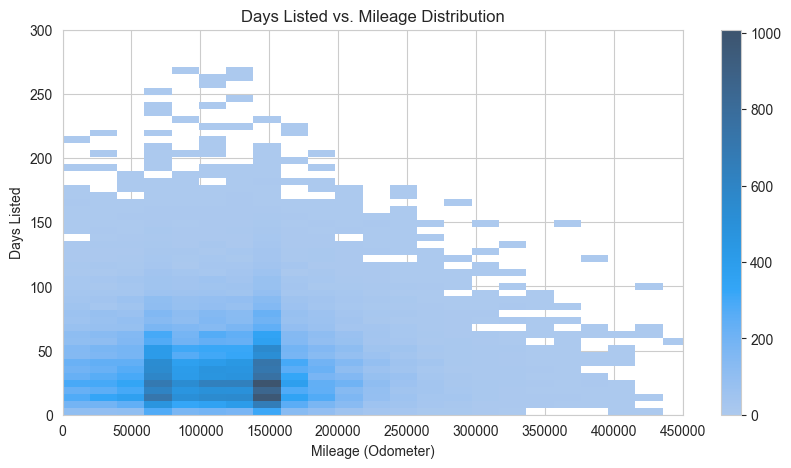

In [207]:
sns.set_style("whitegrid")


plt.figure(figsize=(10, 5))
sns.histplot(
    x='odometer', 
    y='days_listed', 
    data=vehicles, 
    bins=50, 
    cbar=True  
)  
plt.title("Days Listed vs. Mileage Distribution")
plt.xlabel("Mileage (Odometer)")
plt.ylabel("Days Listed")
plt.xlim(0, 450000)  # Adjust limit as needed
plt.ylim(0, 300)  # Adjust limit as needed 
plt.show()

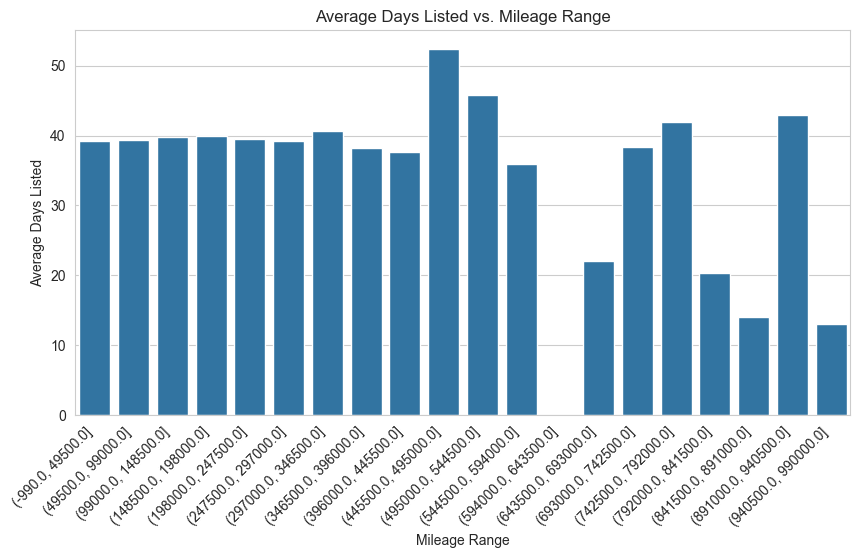

In [208]:
# Create mileage bins
vehicles['mileage_bin'] = pd.cut(vehicles['odometer'], bins=20)  # Adjust bins as needed

# Calculate average days listed for each mileage bin
#mileage_days_listed = vehicles.groupby('mileage_bin')['days_listed'].mean().reset_index()
mileage_days_listed = vehicles.groupby('mileage_bin', observed=True)['days_listed'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='mileage_bin', y='days_listed', data=mileage_days_listed)
plt.title("Average Days Listed vs. Mileage Range")
plt.xlabel("Mileage Range")
plt.ylabel("Average Days Listed")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

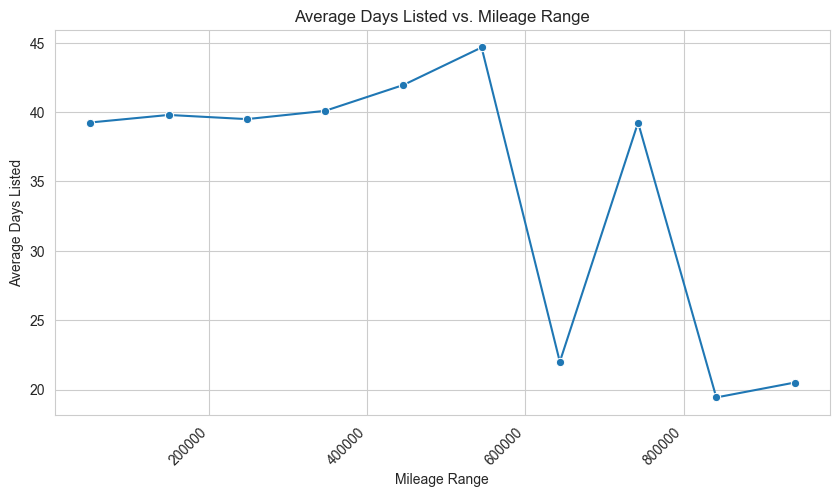

In [209]:
# Create mileage bins (for grouping and averaging)
vehicles['mileage_bin'] = pd.cut(vehicles['odometer'], bins=10)  # Adjust bins as needed

# Calculate average days listed for each mileage bin
mileage_days_listed = vehicles.groupby('mileage_bin', observed=True)['days_listed'].mean().reset_index()

# Convert mileage_bin to numerical data (center of each bin)
mileage_days_listed['mileage_bin_center'] = mileage_days_listed['mileage_bin'].apply(lambda x: x.mid)

# Create the line plot using the numerical mileage_bin_center
plt.figure(figsize=(10, 5))
sns.lineplot(x='mileage_bin_center', y='days_listed', data=mileage_days_listed, marker='o')
plt.title("Average Days Listed vs. Mileage Range")
plt.xlabel("Mileage Range")
plt.ylabel("Average Days Listed")
plt.xticks(rotation=45, ha='right')
plt.show()

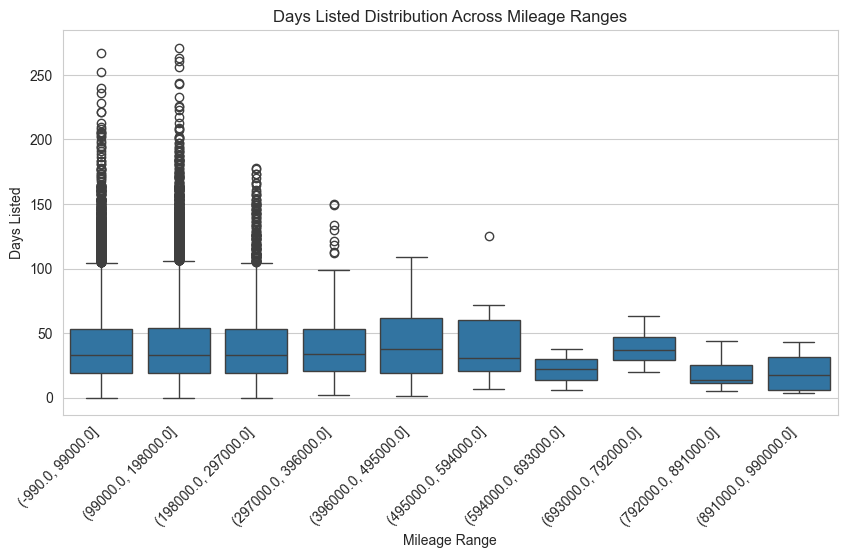

In [210]:
# Create mileage bins (for grouping)
vehicles['mileage_bin'] = pd.cut(vehicles['odometer'], bins=10)  # Adjust bins as needed

# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='mileage_bin', y='days_listed', data=vehicles)  # Use original vehicles DataFrame
plt.title("Days Listed Distribution Across Mileage Ranges")
plt.xlabel("Mileage Range")
plt.ylabel("Days Listed")
plt.xticks(rotation=45, ha='right')
plt.show()

The visuals show that cars with around 45,000 to 55,000 miles sit on the lot the longest, approximately 45 to 55 days. If a dealership wants to sell cars and get them off the lot faster, they may want to avoid purchasing or taking in cars on trade with this amount of mileage on a vehicle. There could be other outside factors not considered in this project but for simplicity this is what this dataset shows.